##Concatenate files:

files = glob('./data/train_FD00*.txt')
frames = [wrangle(files) for file in files]
df=pd.concat(frames,axis=0)

df=pd.concat(frames,axis=0)

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import os

In [55]:
n_=['']*21
for i in range(0,21):
    n_[i]='sens_meas_'+str(i+1)
col_names=['unit_no', 'time', 'op_set1', 'op_set2', 'op_set3']+ n_



In [105]:
files = glob('./data/train_FD00*.txt')
files[0]= files[0].replace('\\', '/')
files[0]

'./data/train_FD001.txt'

In [151]:
ruldf=[0]*5
df=[0]*5

##Read csvs and assign them to df[1] to df[4]
for n in range(1,5):
    df[n]=pd.read_csv(files[n-1], delimiter=" ", names=col_names, header=None, index_col=False)
    df[n]=df[n].set_index('unit_no')
    
    ##Create Remaining Useful Life column (RUL), which is = to the number of readings before failure 
    # (the last reading for each unit is in this dataset represents failure)
    ruldf[n]=df[n][['time']].groupby(by='unit_no').max()
    for x in ruldf[n].index:
        df[n].loc[x,'RUL'] = ruldf[n].loc[x,'time'] - df[n].loc[x,'time']


In [153]:
df[1].tail()

,time,op_set1,op_set2,op_set3,sens_meas_1,sens_meas_2,sens_meas_3,sens_meas_4,sens_meas_5,sens_meas_6,sens_meas_7,sens_meas_8,sens_meas_9,sens_meas_10,sens_meas_11,sens_meas_12,sens_meas_13,sens_meas_14,sens_meas_15,sens_meas_16,sens_meas_17,sens_meas_18,sens_meas_19,sens_meas_20,sens_meas_21,RUL
unit_no,,,,,,,,,,,,,,,,,,,,,,,,,,
100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,21.61,551.43,2388.19,9065.52,1.3,48.07,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,4.0
100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,21.61,550.86,2388.23,9065.11,1.3,48.04,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,3.0
100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,21.61,550.94,2388.24,9065.90,1.3,48.09,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,2.0
100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,21.61,550.68,2388.25,9073.72,1.3,48.39,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,1.0
100,200,-0.0032,-0.0005,100.0,518.67,643.85,1600.38,1432.14,14.62,21.61,550.79,2388.26,9061.48,1.3,48.20,519.30,2388.26,8137.33,8.5036,0.03,396,2388,100.0,38.37,23.0522,0.0


In [39]:
# uni=df.loc[:,(df.nunique()==1)].columns
# df=df.drop(columns=uni)

In [217]:
# df=pd.read_csv('./data/train_FD001.txt', delimiter=" ")
pd.set_option('display.max_columns',50)
df[1].tail(50)

,time,op_set1,op_set2,op_set3,sens_meas_1,sens_meas_2,sens_meas_3,sens_meas_4,sens_meas_5,sens_meas_6,sens_meas_7,sens_meas_8,sens_meas_9,sens_meas_10,sens_meas_11,sens_meas_12,sens_meas_13,sens_meas_14,sens_meas_15,sens_meas_16,sens_meas_17,sens_meas_18,sens_meas_19,sens_meas_20,sens_meas_21,RUL
unit_no,,,,,,,,,,,,,,,,,,,,,,,,,,
100,151,0.0045,0.0003,100.0,518.67,642.67,1586.29,1418.10,14.62,21.61,552.88,2388.17,9066.86,1.3,47.75,521.60,2388.13,8142.62,8.4643,0.03,394,2388,100.0,38.75,23.2139,49.0
100,152,-0.0010,-0.0002,100.0,518.67,643.14,1598.52,1410.88,14.62,21.61,552.67,2388.12,9074.93,1.3,47.79,521.01,2388.10,8144.55,8.4919,0.03,394,2388,100.0,38.82,23.2959,48.0
100,153,-0.0010,-0.0003,100.0,518.67,642.87,1594.54,1411.08,14.62,21.61,552.67,2388.15,9062.27,1.3,47.65,521.16,2388.14,8143.11,8.4594,0.03,394,2388,100.0,38.77,23.1241,47.0
100,154,0.0003,0.0003,100.0,518.67,642.99,1597.59,1412.94,14.62,21.61,552.55,2388.14,9062.72,1.3,47.76,520.76,2388.16,8146.76,8.4750,0.03,394,2388,100.0,38.73,23.1611,46.0
100,155,0.0019,0.0001,100.0,518.67,642.81,1593.42,1420.62,14.62,21.61,552.37,2388.16,9063.61,1.3,47.88,520.59,2388.18,8145.00,8.4722,0.03,396,2388,100.0,38.83,23.2825,45.0
100,156,0.0018,-0.0004,100.0,518.67,643.04,1592.90,1413.23,14.62,21.61,552.58,2388.12,9062.58,1.3,47.80,520.44,2388.14,8134.58,8.4768,0.03,392,2388,100.0,38.55,23.2019,44.0
100,157,0.0020,-0.0002,100.0,518.67,643.17,1595.25,1417.47,14.62,21.61,552.59,2388.09,9069.23,1.3,47.82,521.34,2388.14,8144.93,8.4383,0.03,394,2388,100.0,38.65,23.2264,43.0
100,158,0.0014,-0.0002,100.0,518.67,643.47,1595.56,1408.43,14.62,21.61,552.78,2388.09,9068.32,1.3,47.98,520.67,2388.15,8150.68,8.4588,0.03,395,2388,100.0,38.81,23.1768,42.0
100,159,-0.0011,0.0002,100.0,518.67,643.33,1594.51,1424.49,14.62,21.61,553.07,2388.14,9067.19,1.3,47.73,520.63,2388.19,8136.18,8.4446,0.03,393,2388,100.0,38.59,23.3186,41.0


In [157]:
df[1].nunique()

time             362
op_set1          158
op_set2           13
op_set3            1
sens_meas_1        1
sens_meas_2      310
sens_meas_3     3012
sens_meas_4     4051
sens_meas_5        1
sens_meas_6        2
sens_meas_7      513
sens_meas_8       53
sens_meas_9     6403
sens_meas_10       1
sens_meas_11     159
sens_meas_12     427
sens_meas_13      56
sens_meas_14    6078
sens_meas_15    1918
sens_meas_16       1
sens_meas_17      13
sens_meas_18       1
sens_meas_19       1
sens_meas_20     120
sens_meas_21    4745
RUL              362
dtype: int64

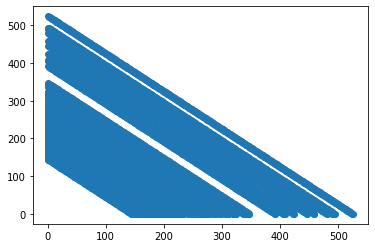

In [52]:
plt.scatter(df['time'], df['RUL'])

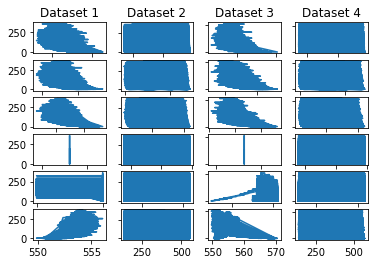

In [214]:
fig, axs = plt.subplots(6, 4)
for n in range(1,5):
    axs[0,n-1].plot(df[n]['sens_meas_2'], df[n]['RUL'])
    axs[1,n-1].plot(df[n]['sens_meas_3'], df[n]['RUL'])
    axs[2,n-1].plot(df[n]['sens_meas_4'], df[n]['RUL'])
    axs[3,n-1].plot(df[n]['sens_meas_5'], df[n]['RUL'])
    axs[4,n-1].plot(df[n]['sens_meas_6'], df[n]['RUL'])
    axs[5,n-1].plot(df[n]['sens_meas_7'], df[n]['RUL'])
#     
axs[0, 0].set_title('Dataset 1')
axs[0, 1].set_title('Dataset 2')
axs[0, 2].set_title('Dataset 3')
axs[0, 3].set_title('Dataset 4')
    
for ax in axs.flat:
    ax.label_outer()
    


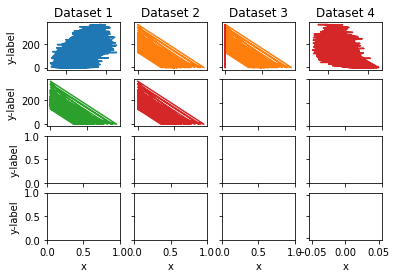

In [218]:
fig, axs = plt.subplots(4, 4)
axs[0, 0].plot(df[1]['sens_meas_2'], df[1]['RUL'])
axs[0, 0].set_title('Dataset 1')

axs[0, 1].plot(df[1]['time'], df[1]['RUL'], 'tab:orange')
axs[0, 1].set_title('Dataset 2')

axs[0, 2].plot(df[1]['time'], df[1]['RUL'], 'tab:orange')
axs[0, 2].set_title('Dataset 3')

axs[0, 3].plot(df[1]['sens_meas_2'], df[1]['RUL'], 'tab:red')
axs[0, 3].set_title('Dataset 4')

# axs[0, 4].plot(df[1]['sens_meas_2'], df[1]['RUL'], 'tab:red')
# axs[0, 4].set_title('Dataset 4')

axs[1, 0].plot(df[1]['time'], df[1]['RUL'], 'tab:green')

axs[1, 1].plot(df[1]['time'], df[1]['RUL'], 'tab:red')
axs[0, 2].plot(df[1]['op_set1'], df[1]['RUL'], 'tab:red')


for ax in axs.flat:
    ax.set(xlabel='x', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
ax.autoscale()

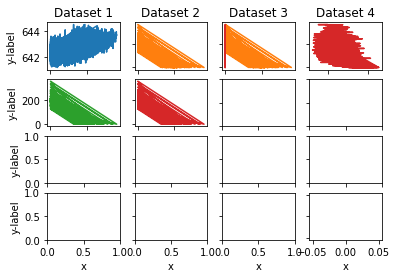

In [220]:
fig, axs = plt.subplots(4, 4)
axs[0, 0].plot(df[1]['time'], df[1]['sens_meas_2'])
axs[0, 0].set_title('Dataset 1')

axs[0, 1].plot(df[1]['time'], df[1]['RUL'], 'tab:orange')
axs[0, 1].set_title('Dataset 2')

axs[0, 2].plot(df[1]['time'], df[1]['RUL'], 'tab:orange')
axs[0, 2].set_title('Dataset 3')

axs[0, 3].plot(df[1]['sens_meas_2'], df[1]['RUL'], 'tab:red')
axs[0, 3].set_title('Dataset 4')

# axs[0, 4].plot(df[1]['sens_meas_2'], df[1]['RUL'], 'tab:red')
# axs[0, 4].set_title('Dataset 4')

axs[1, 0].plot(df[1]['time'], df[1]['RUL'], 'tab:green')

axs[1, 1].plot(df[1]['time'], df[1]['RUL'], 'tab:red')
axs[0, 2].plot(df[1]['op_set1'], df[1]['RUL'], 'tab:red')


for ax in axs.flat:
    ax.set(xlabel='x', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
ax.autoscale()

Complete these tasks for your project, and document your decisions.

Choose your target. Which column in your tabular dataset will you predict?
**The column to be used is the 'Remaining Useful Life' column**
Is your problem regression or classification?
**Classification**
How is your target distributed?

Classification: How many classes? Are the classes imbalanced?
Regression: Is the target right-skewed? If so, you may want to log transform the target.
Choose your evaluation metric(s).
**The nature of the data makes this target neither left nor right skewed**

Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
**Probably RMSE and R2**
Choose which observations you will use to train, validate, and test your model.
**All**
Are some observations outliers? Will you exclude them?
**Haven't found any, only will exclude columns where all values are the same**
Will you do a random split or a time-based split?
**Data is already split randomly**
Begin to clean and explore your data.
Begin to choose which features, if any, to exclude. Would some features "leak" future information?

In [107]:
df1=pd.read_csv('./data/RUL_FD001.txt', header=None)
df1

,0
0,112
1,98
2,69
3,82
4,91
...,...
95,137
96,82
97,59
98,117
